In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline 

In [2]:
data = pd.read_csv('../users_v2.csv')

In [61]:
y = data['target'].values
X = data.iloc[:,:-1].values
X_train, X_test, y_train, y_test = train_test_split(X,y)


rfc = RandomForestClassifier(n_estimators=2000, max_depth=5, max_features=5, n_jobs=-1, oob_score=True)
rfc.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [62]:
y_hat = rfc.predict(X_test)

In [63]:
y_train_hat = rfc.predict(X_train)

In [69]:
rfc.oob_score

True

In [7]:
def standard_confusion_matrix(y_true, y_predict):
    y_true = np.array(y_true)
    y_predict = np.array(y_predict)

    tp = np.sum((y_true == y_predict) & (y_predict==1))
    fp = np.sum((y_true != y_predict) & (y_predict==1))
    fn = np.sum((y_true != y_predict) & (y_predict==0))
    tn = np.sum((y_true == y_predict) & (y_predict==0))
   
    return np.array([[tp, fp], [fn, tn]])

In [64]:
standard_confusion_matrix(y_test, y_hat)

array([[ 136,   77],
       [ 490, 8781]])

In [65]:
precision_score(y_test, y_hat)

0.6384976525821596

In [66]:
rfc.score(X_test, y_test)

0.9402150991142978

In [67]:
recall_score(y_test, y_hat)

0.21725239616613418

In [43]:
standard_confusion_matrix(y_train, y_train_hat)

array([[  801,   180],
       [ 1198, 26270]])

In [44]:
recall_score(y_train, y_train_hat)

0.40070035017508754

In [45]:
precision_score(y_train, y_train_hat)

0.8165137614678899

In [103]:
#plt.scatter(rfc.predict_proba(X_test)[0][0], rfc.predict_proba(X_test)[0][1])

In [104]:
(rfc.predict_proba(X_test)).astype(list)

array([[0.887018067356094, 0.11298193264390567],
       [0.9442294965850291, 0.055770503414973326],
       [0.991674925775369, 0.008325074224631378],
       ...,
       [0.9943583371394201, 0.0056416628605803106],
       [0.6931683874912261, 0.30683161250877355],
       [0.699386247835873, 0.3006137521641268]], dtype=object)

In [105]:
def roc_curve_(probabilities, labels):
    '''
    INPUT: numpy array, numpy array
    OUTPUT: list, list, list

    Take a numpy array of the predicted probabilities and a numpy array of the
    true labels.
    Return the True Positive Rates, False Positive Rates and Thresholds for the
    ROC curve.
    '''
    sorted = np.sort(probabilities)
    threshold = list(sorted)
    true_pos = labels.sum()
    true_neg =  len(labels)-true_pos
    
    TPR =[]
    FPR = []
    for vals in threshold:        
        pos = np.sum((vals <= probabilities) & (labels==True))
        f_pos = np.sum((vals <= probabilities) & (labels==False))

        TPR.append(pos/true_pos)
        FPR.append(f_pos/true_neg)
    return TPR, FPR, threshold

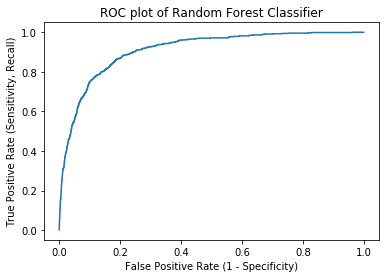

In [106]:
probabilities = rfc.predict_proba(X_test)[:, 1]

tpr, fpr, thresholds = roc_curve_(probabilities, y_test)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity, Recall)")
plt.title("ROC plot of Random Forest Classifier")
plt.show()

In [ ]:
#Looking at Feature Importances 

In [47]:
data.columns

Index(['user_id', 'topic_mode', 'suggested', 'review_mode', 'time_taken',
       'correct', 'count_attempts', 'hint_used', 'count_hints',
       'earned_proficiency', 'points_earned', 'more_than_ten_activities',
       'more_than_100_activities', 'more_than_1000_activities',
       'active_more_than_1_day', 'active_at_least_5_days',
       'active_at_least_10_days', 'active_from_last', 'active_from_last_sq',
       'count_hints_sq', 'count_attempts_sq', 'review_mode_sq', 'one_before',
       'two_before', 'three_before', 'four_before', 'five_before',
       'six_before', 'seven_before', 'target'],
      dtype='object')

In [52]:
col_list = ['user_id','topic_mode', 'suggested', 'review_mode', 'time_taken',
       'correct', 'count_attempts', 'hint_used', 'count_hints',
       'earned_proficiency', 'points_earned', 'more_than_ten_activities',
       'more_than_100_activities', 'more_than_1000_activities',
       'active_more_than_1_day', 'active_at_least_5_days',
       'active_at_least_10_days', 'active_from_last', 'active_from_last_sq',
       'count_hints_sq', 'count_attempts_sq', 'review_mode_sq', 'one_before',
       'two_before', 'three_before', 'four_before', 'five_before',
       'six_before', 'seven_before']

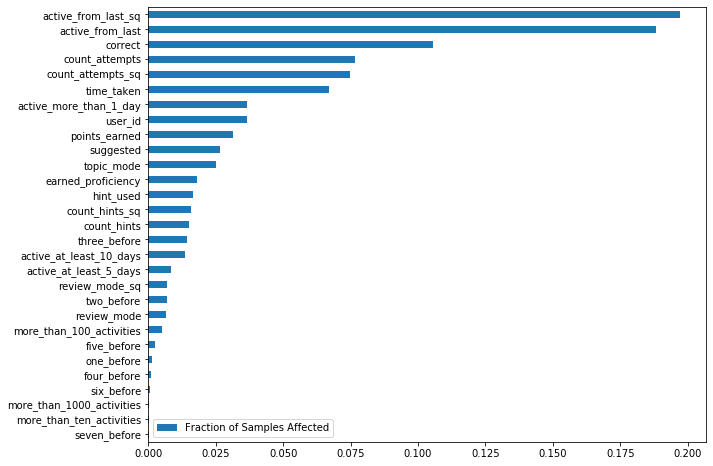

In [53]:
feat_scores = pd.DataFrame({'Fraction of Samples Affected' : rfc.feature_importances_},
                           index=col_list)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh', figsize=(10,8))

In [79]:
rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model


In [92]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3,8,5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = True
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 650, 1100, 1550, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 4, 5, 6, 8, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': True}


In [ ]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.5min
